In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import scipy.stats as st
import statsmodels as sm
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
il06veh = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il06veh.xlsx")
il06road = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il06road.xlsx")
il06occ = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il06occ.xlsx")
il06acc = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il06acc.xlsx")

In [3]:
print(il06veh.shape)
print(il06road.shape)
print(il06occ.shape)
print(il06acc.shape)
print(il06veh.columns)
print(il06road.columns)
print(il06occ.columns)
print(il06acc.columns)

(382033, 4)
(160693, 17)
(128760, 3)
(201773, 10)
Index(['caseno', 'vehno', 'vehtype', 'drv_inj'], dtype='object')
Index(['medwid', 'no_lanes', 'lanewid', 'aadt', 'trf_cntl', 'curv_rad',
       'begmp', 'seg_lng', 'endmp', 'access', 'oneway', 'spd_limt', 'med_type',
       'surf_typ', 'cnty_rte', 'rururb', 'rodwycls'],
      dtype='object')
Index(['caseno', 'vehno', 'seatpos'], dtype='object')
Index(['cntyrte', 'milepost', 'rodwycls', 'caseno', 'acc_date', 'weather',
       'severity', 'numvehs', 'hour', 'rdsurf'],
      dtype='object')


In [4]:
il07veh = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il07veh.xlsx")
il07road = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il07road.xlsx")
il07occ = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il07occ.xlsx")
il07acc = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il07acc.xlsx")
il08veh = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il08veh.xlsx")
il08road = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il08road.xlsx")
il08occ = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il08occ.xlsx")
il08acc = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il08acc.xlsx")
il09veh = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il09veh.xlsx")
il09road = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il09road.xlsx")
il09occ = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il09occ.xlsx")
il09acc = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il09acc.xlsx")

In [142]:
il10veh = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il10veh.xlsx")
il10road = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il10road.xlsx")
il10occ = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il10occ.xlsx")
il10acc = pd.read_excel("~/Desktop/UIUC/Courses/Spring 2021/CS 498 Data Science and Analytics/MP/Final Project/My Proposal/IL/il10acc.xlsx")

In [42]:
#Since different years road data has same cnty_rte, I cannot append them before merging Accident Information. 
#il_veh_train = il06veh.append([il07veh, il08veh,il09veh])
#il_occ_train = il06occ.append([il07occ, il08occ,il09occ])
#il_acc_train = il06acc.append([il07acc, il08acc,il09acc])
#il_road_train = il06road.append([il07road, il08road,il09road])
#print(il_veh_train.shape, il06veh.shape[0]+il07veh.shape[0]+il08veh.shape[0]+il09veh.shape[0])
#print(il_occ_train.shape, il06occ.shape[0]+il07occ.shape[0]+il08occ.shape[0]+il09occ.shape[0])
#print(il_acc_train.shape, il06acc.shape[0]+il07acc.shape[0]+il08acc.shape[0]+il09acc.shape[0])
#print(il_road_train.shape, il06road.shape[0]+il07road.shape[0]+il08road.shape[0]+il09road.shape[0])

In [45]:
#il_veh_train.index = np.arange(len(il_veh_train))
#il_occ_train.index = np.arange(len(il_occ_train))
#il_acc_train.index = np.arange(len(il_acc_train))
#il_road_train.index = np.arange(len(il_road_train))

In [132]:
caseno_with_pedacc06 = il06veh.loc[il06veh['vehtype'] == 98, 'caseno'].to_numpy()
caseno_with_pedacc07 = il07veh.loc[il07veh['vehtype'] == 98, 'caseno'].to_numpy()
caseno_with_pedacc08 = il08veh.loc[il08veh['vehtype'] == 98, 'caseno'].to_numpy()
caseno_with_pedacc09 = il09veh.loc[il09veh['vehtype'] == 98, 'caseno'].to_numpy()
print(len(caseno_with_pedacc06),len(caseno_with_pedacc07),len(caseno_with_pedacc08),len(caseno_with_pedacc09))
print(len(caseno_with_pedacc06)+len(caseno_with_pedacc07)+len(caseno_with_pedacc08)+len(caseno_with_pedacc09))
#caseno_with_pedacc.unique

3997 4670 4761 3705
17133


In [143]:
caseno_with_pedacc10 = il10veh.loc[il10veh['vehtype'] == 98, 'caseno'].to_numpy()

In [145]:
TestingData10.columns

Index(['medwid', 'no_lanes', 'lanewid', 'aadt', 'trf_cntl', 'curv_rad',
       'begmp', 'seg_lng', 'endmp', 'access', 'oneway', 'spd_limt', 'med_type',
       'surf_typ', 'cnty_rte', 'rururb', 'rodwycls'],
      dtype='object')

Index(['medwid', 'no_lanes', 'lanewid', 'aadt', 'trf_cntl', 'curv_rad',
       'begmp', 'seg_lng', 'endmp', 'access', 'oneway', 'spd_limt', 'med_type',
       'surf_typ', 'cnty_rte', 'rururb', 'rodwycls', 'AccCount',
       'Severity_PDO', 'Severity_Inj_TypeA', 'Severity_Inj_TypeB',
       'Severity_Inj_TypeC', 'Severity_Fatal', 'Severity_Unknown',
       'Weather_Clear', 'Weather_Rain', 'Weather_Snow', 'Weather_Fog',
       'Weather_Hail', 'Weather_CrossWind', 'Weather_Other',
       'Weather_Unknown'],
      dtype='object')

In [146]:
caseno_with_pedacc10

array([201001010520, 201001011621, 201001011644, ..., 201001474895,
       201001474919, 201001474919])

In [131]:
#TrainingData06 = il06road.copy()
#TrainingData07 = il07road.copy()
#TrainingData08 = il08road.copy()
#TrainingData09 = il09road.copy()

In [144]:
TestingData10 = il10road.copy()

In [102]:
TrainingData06['AccCount'] = 0
#Injury Severity
TrainingData06['Severity_PDO'] = 0
TrainingData06['Severity_Inj_TypeA'] = 0
TrainingData06['Severity_Inj_TypeB'] = 0
TrainingData06['Severity_Inj_TypeC'] = 0
TrainingData06['Severity_Fatal'] = 0
TrainingData06['Severity_Unknown'] = 0 # Unknown
#Weather Type
TrainingData06['Weather_Clear'] = 0
TrainingData06['Weather_Rain'] = 0
TrainingData06['Weather_Snow'] = 0
TrainingData06['Weather_Fog'] = 0
TrainingData06['Weather_Hail'] = 0
TrainingData06['Weather_CrossWind'] = 0
TrainingData06['Weather_Other'] = 0
TrainingData06['Weather_Unknown'] = 0

In [103]:
# Get accident info into AccData df
acc_with_mp_overlap = [] #some road locations have same cnty_rte value and end mp of one segment might be after start mp of another segment
for i, row in il06acc.iterrows():
    if row['caseno'] in caseno_with_pedacc06:
        continue
    cntyrte_val = row['cntyrte']
    mp = row['milepost']
    severity = row['severity']
    weather = row['weather']
    if TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp), 'AccCount'].shape[0]>1:
        acc_with_mp_overlap.append(i)
        mask = (TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp)
        TrainingData06.loc[mask.idxmax(), 'AccCount'] += 1
        if severity == 0:
            TrainingData06.loc[mask.idxmax(), 'Severity_PDO'] += 1
        elif severity == 1:
            TrainingData06.loc[mask.idxmax(), 'Severity_Inj_TypeA'] += 1
        elif severity == 2:
            TrainingData06.loc[mask.idxmax(), 'Severity_Inj_TypeB'] += 1
        elif severity == 3:
            TrainingData06.loc[mask.idxmax(), 'Severity_Inj_TypeC'] += 1
        elif severity == 4:
            TrainingData06.loc[mask.idxmax(), 'Severity_Fatal'] += 1
        else:
            TrainingData06.loc[mask.idxmax(), 'Severity_Unknown'] += 1
        if weather == 1:
            TrainingData06.loc[mask.idxmax(), 'Weather_Clear'] += 1
        elif weather == 2:
            TrainingData06.loc[mask.idxmax(), 'Weather_Rain'] += 1
        elif weather == 3:
            TrainingData06.loc[mask.idxmax(), 'Weather_Snow'] += 1
        elif weather == 4:
            TrainingData06.loc[mask.idxmax(), 'Weather_Fog'] += 1
        elif weather == 5:
            TrainingData06.loc[mask.idxmax(), 'Weather_Hail'] += 1
        elif weather == 6:
            TrainingData06.loc[mask.idxmax(), 'Weather_CrossWind'] += 1
        elif weather == 7:
            TrainingData06.loc[mask.idxmax(), 'Weather_Other'] += 1
        else:
            TrainingData06.loc[mask.idxmax(), 'Weather_Unknown'] += 1
    elif TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp), 'AccCount'].shape[0]==1:
        TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'AccCount']+=1
        if severity == 0:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Severity_PDO']+=1
        elif severity == 1:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Severity_Inj_TypeA']+=1
        elif severity == 2:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Severity_Inj_TypeB']+=1
        elif severity == 3:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Severity_Inj_TypeC']+=1
        elif severity == 4:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Severity_Fatal']+=1
        else:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Severity_Unknown']+=1
        if weather == 1:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Weather_Clear']+=1
        elif weather == 2:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Weather_Rain']+=1
        elif weather == 3:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Weather_Snow']+=1
        elif weather == 4:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Weather_Fog']+=1
        elif weather == 5:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Weather_Hail']+=1
        elif weather == 6:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Weather_CrossWind']+=1
        elif weather == 7:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Weather_Other']+=1
        else:
            TrainingData06.loc[(TrainingData06.cnty_rte == cntyrte_val) & (TrainingData06.begmp <= mp) & (TrainingData06.endmp >= mp),'Weather_Unknown']+=1
    else:
        print(i)
        break

In [129]:
TrainingData07['AccCount'] = 0
#Injury Severity
TrainingData07['Severity_PDO'] = 0
TrainingData07['Severity_Inj_TypeA'] = 0
TrainingData07['Severity_Inj_TypeB'] = 0
TrainingData07['Severity_Inj_TypeC'] = 0
TrainingData07['Severity_Fatal'] = 0
TrainingData07['Severity_Unknown'] = 0 # Unknown
#Weather Type
TrainingData07['Weather_Clear'] = 0
TrainingData07['Weather_Rain'] = 0
TrainingData07['Weather_Snow'] = 0
TrainingData07['Weather_Fog'] = 0
TrainingData07['Weather_Hail'] = 0
TrainingData07['Weather_CrossWind'] = 0
TrainingData07['Weather_Other'] = 0
TrainingData07['Weather_Unknown'] = 0
# Get accident info into AccData df
acc_with_mp_overlap_07 = [] #some road locations have same cnty_rte value and end mp of one segment might be after start mp of another segment
for i, row in il07acc.iterrows():
    if row['caseno'] in caseno_with_pedacc07:
        continue
    cntyrte_val = row['cntyrte']
    mp = row['milepost']
    severity = row['severity']
    weather = row['weather']
    if TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp), 'AccCount'].shape[0]>1:
        acc_with_mp_overlap_07.append(i)
        mask = (TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp)
        TrainingData07.loc[mask.idxmax(), 'AccCount'] += 1
        if severity == 0:
            TrainingData07.loc[mask.idxmax(), 'Severity_PDO'] += 1
        elif severity == 1:
            TrainingData07.loc[mask.idxmax(), 'Severity_Inj_TypeA'] += 1
        elif severity == 2:
            TrainingData07.loc[mask.idxmax(), 'Severity_Inj_TypeB'] += 1
        elif severity == 3:
            TrainingData07.loc[mask.idxmax(), 'Severity_Inj_TypeC'] += 1
        elif severity == 4:
            TrainingData07.loc[mask.idxmax(), 'Severity_Fatal'] += 1
        else:
            TrainingData07.loc[mask.idxmax(), 'Severity_Unknown'] += 1
        if weather == 1:
            TrainingData07.loc[mask.idxmax(), 'Weather_Clear'] += 1
        elif weather == 2:
            TrainingData07.loc[mask.idxmax(), 'Weather_Rain'] += 1
        elif weather == 3:
            TrainingData07.loc[mask.idxmax(), 'Weather_Snow'] += 1
        elif weather == 4:
            TrainingData07.loc[mask.idxmax(), 'Weather_Fog'] += 1
        elif weather == 5:
            TrainingData07.loc[mask.idxmax(), 'Weather_Hail'] += 1
        elif weather == 6:
            TrainingData07.loc[mask.idxmax(), 'Weather_CrossWind'] += 1
        elif weather == 7:
            TrainingData07.loc[mask.idxmax(), 'Weather_Other'] += 1
        else:
            TrainingData07.loc[mask.idxmax(), 'Weather_Unknown'] += 1
    elif TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp), 'AccCount'].shape[0]==1:
        TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'AccCount']+=1
        if severity == 0:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Severity_PDO']+=1
        elif severity == 1:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Severity_Inj_TypeA']+=1
        elif severity == 2:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Severity_Inj_TypeB']+=1
        elif severity == 3:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Severity_Inj_TypeC']+=1
        elif severity == 4:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Severity_Fatal']+=1
        else:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Severity_Unknown']+=1
        if weather == 1:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Weather_Clear']+=1
        elif weather == 2:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Weather_Rain']+=1
        elif weather == 3:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Weather_Snow']+=1
        elif weather == 4:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Weather_Fog']+=1
        elif weather == 5:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Weather_Hail']+=1
        elif weather == 6:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Weather_CrossWind']+=1
        elif weather == 7:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Weather_Other']+=1
        else:
            TrainingData07.loc[(TrainingData07.cnty_rte == cntyrte_val) & (TrainingData07.begmp <= mp) & (TrainingData07.endmp >= mp),'Weather_Unknown']+=1
    else:
        print(i)
        break

In [133]:
TrainingData08['AccCount'] = 0
#Injury Severity
TrainingData08['Severity_PDO'] = 0
TrainingData08['Severity_Inj_TypeA'] = 0
TrainingData08['Severity_Inj_TypeB'] = 0
TrainingData08['Severity_Inj_TypeC'] = 0
TrainingData08['Severity_Fatal'] = 0
TrainingData08['Severity_Unknown'] = 0 # Unknown
#Weather Type
TrainingData08['Weather_Clear'] = 0
TrainingData08['Weather_Rain'] = 0
TrainingData08['Weather_Snow'] = 0
TrainingData08['Weather_Fog'] = 0
TrainingData08['Weather_Hail'] = 0
TrainingData08['Weather_CrossWind'] = 0
TrainingData08['Weather_Other'] = 0
TrainingData08['Weather_Unknown'] = 0
# Get accident info into AccData df
acc_with_mp_overlap_08 = [] #some road locations have same cnty_rte value and end mp of one segment might be after start mp of another segment
for i, row in il08acc.iterrows():
    if row['caseno'] in caseno_with_pedacc08:
        continue
    cntyrte_val = row['cntyrte']
    mp = row['milepost']
    severity = row['severity']
    weather = row['weather']
    if TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp), 'AccCount'].shape[0]>1:
        acc_with_mp_overlap_08.append(i)
        mask = (TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp)
        TrainingData08.loc[mask.idxmax(), 'AccCount'] += 1
        if severity == 0:
            TrainingData08.loc[mask.idxmax(), 'Severity_PDO'] += 1
        elif severity == 1:
            TrainingData08.loc[mask.idxmax(), 'Severity_Inj_TypeA'] += 1
        elif severity == 2:
            TrainingData08.loc[mask.idxmax(), 'Severity_Inj_TypeB'] += 1
        elif severity == 3:
            TrainingData08.loc[mask.idxmax(), 'Severity_Inj_TypeC'] += 1
        elif severity == 4:
            TrainingData08.loc[mask.idxmax(), 'Severity_Fatal'] += 1
        else:
            TrainingData08.loc[mask.idxmax(), 'Severity_Unknown'] += 1
        if weather == 1:
            TrainingData08.loc[mask.idxmax(), 'Weather_Clear'] += 1
        elif weather == 2:
            TrainingData08.loc[mask.idxmax(), 'Weather_Rain'] += 1
        elif weather == 3:
            TrainingData08.loc[mask.idxmax(), 'Weather_Snow'] += 1
        elif weather == 4:
            TrainingData08.loc[mask.idxmax(), 'Weather_Fog'] += 1
        elif weather == 5:
            TrainingData08.loc[mask.idxmax(), 'Weather_Hail'] += 1
        elif weather == 6:
            TrainingData08.loc[mask.idxmax(), 'Weather_CrossWind'] += 1
        elif weather == 7:
            TrainingData08.loc[mask.idxmax(), 'Weather_Other'] += 1
        else:
            TrainingData08.loc[mask.idxmax(), 'Weather_Unknown'] += 1
    elif TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp), 'AccCount'].shape[0]==1:
        TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'AccCount']+=1
        if severity == 0:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Severity_PDO']+=1
        elif severity == 1:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Severity_Inj_TypeA']+=1
        elif severity == 2:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Severity_Inj_TypeB']+=1
        elif severity == 3:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Severity_Inj_TypeC']+=1
        elif severity == 4:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Severity_Fatal']+=1
        else:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Severity_Unknown']+=1
        if weather == 1:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Weather_Clear']+=1
        elif weather == 2:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Weather_Rain']+=1
        elif weather == 3:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Weather_Snow']+=1
        elif weather == 4:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Weather_Fog']+=1
        elif weather == 5:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Weather_Hail']+=1
        elif weather == 6:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Weather_CrossWind']+=1
        elif weather == 7:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Weather_Other']+=1
        else:
            TrainingData08.loc[(TrainingData08.cnty_rte == cntyrte_val) & (TrainingData08.begmp <= mp) & (TrainingData08.endmp >= mp),'Weather_Unknown']+=1
    else:
        print(i)
        break

In [119]:
TrainingData09['AccCount'] = 0
#Injury Severity
TrainingData09['Severity_PDO'] = 0
TrainingData09['Severity_Inj_TypeA'] = 0
TrainingData09['Severity_Inj_TypeB'] = 0
TrainingData09['Severity_Inj_TypeC'] = 0
TrainingData09['Severity_Fatal'] = 0
TrainingData09['Severity_Unknown'] = 0 # Unknown
#Weather Type
TrainingData09['Weather_Clear'] = 0
TrainingData09['Weather_Rain'] = 0
TrainingData09['Weather_Snow'] = 0
TrainingData09['Weather_Fog'] = 0
TrainingData09['Weather_Hail'] = 0
TrainingData09['Weather_CrossWind'] = 0
TrainingData09['Weather_Other'] = 0
TrainingData09['Weather_Unknown'] = 0
# Get accident info into AccData df
acc_with_mp_overlap_09 = [] #some road locations have same cnty_rte value and end mp of one segment might be after start mp of another segment
for i, row in il09acc.iterrows():
    if row['caseno'] in caseno_with_pedacc09:
        continue
    cntyrte_val = row['cntyrte']
    mp = row['milepost']
    severity = row['severity']
    weather = row['weather']
    if TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp), 'AccCount'].shape[0]>1:
        acc_with_mp_overlap_09.append(i)
        mask = (TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp)
        TrainingData09.loc[mask.idxmax(), 'AccCount'] += 1
        if severity == 0:
            TrainingData09.loc[mask.idxmax(), 'Severity_PDO'] += 1
        elif severity == 1:
            TrainingData09.loc[mask.idxmax(), 'Severity_Inj_TypeA'] += 1
        elif severity == 2:
            TrainingData09.loc[mask.idxmax(), 'Severity_Inj_TypeB'] += 1
        elif severity == 3:
            TrainingData09.loc[mask.idxmax(), 'Severity_Inj_TypeC'] += 1
        elif severity == 4:
            TrainingData09.loc[mask.idxmax(), 'Severity_Fatal'] += 1
        else:
            TrainingData09.loc[mask.idxmax(), 'Severity_Unknown'] += 1
        if weather == 1:
            TrainingData09.loc[mask.idxmax(), 'Weather_Clear'] += 1
        elif weather == 2:
            TrainingData09.loc[mask.idxmax(), 'Weather_Rain'] += 1
        elif weather == 3:
            TrainingData09.loc[mask.idxmax(), 'Weather_Snow'] += 1
        elif weather == 4:
            TrainingData09.loc[mask.idxmax(), 'Weather_Fog'] += 1
        elif weather == 5:
            TrainingData09.loc[mask.idxmax(), 'Weather_Hail'] += 1
        elif weather == 6:
            TrainingData09.loc[mask.idxmax(), 'Weather_CrossWind'] += 1
        elif weather == 7:
            TrainingData09.loc[mask.idxmax(), 'Weather_Other'] += 1
        else:
            TrainingData09.loc[mask.idxmax(), 'Weather_Unknown'] += 1
    elif TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp), 'AccCount'].shape[0]==1:
        TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'AccCount']+=1
        if severity == 0:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Severity_PDO']+=1
        elif severity == 1:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Severity_Inj_TypeA']+=1
        elif severity == 2:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Severity_Inj_TypeB']+=1
        elif severity == 3:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Severity_Inj_TypeC']+=1
        elif severity == 4:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Severity_Fatal']+=1
        else:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Severity_Unknown']+=1
        if weather == 1:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Weather_Clear']+=1
        elif weather == 2:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Weather_Rain']+=1
        elif weather == 3:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Weather_Snow']+=1
        elif weather == 4:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Weather_Fog']+=1
        elif weather == 5:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Weather_Hail']+=1
        elif weather == 6:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Weather_CrossWind']+=1
        elif weather == 7:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Weather_Other']+=1
        else:
            TrainingData09.loc[(TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp),'Weather_Unknown']+=1
    else:
        print(i)
        break

In [147]:
TestingData10['AccCount'] = 0
#Injury Severity
TestingData10['Severity_PDO'] = 0
TestingData10['Severity_Inj_TypeA'] = 0
TestingData10['Severity_Inj_TypeB'] = 0
TestingData10['Severity_Inj_TypeC'] = 0
TestingData10['Severity_Fatal'] = 0
TestingData10['Severity_Unknown'] = 0 # Unknown
#Weather Type
TestingData10['Weather_Clear'] = 0
TestingData10['Weather_Rain'] = 0
TestingData10['Weather_Snow'] = 0
TestingData10['Weather_Fog'] = 0
TestingData10['Weather_Hail'] = 0
TestingData10['Weather_CrossWind'] = 0
TestingData10['Weather_Other'] = 0
TestingData10['Weather_Unknown'] = 0
# Get accident info into AccData df
acc_with_mp_overlap_10 = [] #some road locations have same cnty_rte value and end mp of one segment might be after start mp of another segment
for i, row in il10acc.iterrows():
    if row['caseno'] in caseno_with_pedacc10:
        continue
    cntyrte_val = row['cntyrte']
    mp = row['milepost']
    severity = row['severity']
    weather = row['weather']
    if TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp), 'AccCount'].shape[0]>1:
        acc_with_mp_overlap_10.append(i)
        mask = (TrainingData09.cnty_rte == cntyrte_val) & (TrainingData09.begmp <= mp) & (TrainingData09.endmp >= mp)
        TestingData10.loc[mask.idxmax(), 'AccCount'] += 1
        if severity == 0:
            TestingData10.loc[mask.idxmax(), 'Severity_PDO'] += 1
        elif severity == 1:
            TestingData10.loc[mask.idxmax(), 'Severity_Inj_TypeA'] += 1
        elif severity == 2:
            TestingData10.loc[mask.idxmax(), 'Severity_Inj_TypeB'] += 1
        elif severity == 3:
            TestingData10.loc[mask.idxmax(), 'Severity_Inj_TypeC'] += 1
        elif severity == 4:
            TestingData10.loc[mask.idxmax(), 'Severity_Fatal'] += 1
        else:
            TestingData10.loc[mask.idxmax(), 'Severity_Unknown'] += 1
        if weather == 1:
            TestingData10.loc[mask.idxmax(), 'Weather_Clear'] += 1
        elif weather == 2:
            TestingData10.loc[mask.idxmax(), 'Weather_Rain'] += 1
        elif weather == 3:
            TestingData10.loc[mask.idxmax(), 'Weather_Snow'] += 1
        elif weather == 4:
            TestingData10.loc[mask.idxmax(), 'Weather_Fog'] += 1
        elif weather == 5:
            TestingData10.loc[mask.idxmax(), 'Weather_Hail'] += 1
        elif weather == 6:
            TestingData10.loc[mask.idxmax(), 'Weather_CrossWind'] += 1
        elif weather == 7:
            TestingData10.loc[mask.idxmax(), 'Weather_Other'] += 1
        else:
            TestingData10.loc[mask.idxmax(), 'Weather_Unknown'] += 1
    elif TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp), 'AccCount'].shape[0]==1:
        TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'AccCount']+=1
        if severity == 0:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Severity_PDO']+=1
        elif severity == 1:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Severity_Inj_TypeA']+=1
        elif severity == 2:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Severity_Inj_TypeB']+=1
        elif severity == 3:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Severity_Inj_TypeC']+=1
        elif severity == 4:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Severity_Fatal']+=1
        else:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Severity_Unknown']+=1
        if weather == 1:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Weather_Clear']+=1
        elif weather == 2:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Weather_Rain']+=1
        elif weather == 3:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Weather_Snow']+=1
        elif weather == 4:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Weather_Fog']+=1
        elif weather == 5:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Weather_Hail']+=1
        elif weather == 6:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Weather_CrossWind']+=1
        elif weather == 7:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Weather_Other']+=1
        else:
            TestingData10.loc[(TestingData10.cnty_rte == cntyrte_val) & (TestingData10.begmp <= mp) & (TestingData10.endmp >= mp),'Weather_Unknown']+=1
    else:
        print(i)
        break

In [106]:
# Get accident info into AccData df
#acc_with_mp_overlap = [] #some road locations have same cnty_rte value and end mp of one segment might be after start mp of another segment
#for i, row in il_acc_train.iterrows():
#    cntyrte_val = row['cntyrte']
#    mp = row['milepost']
#    if AllData06.loc[(AllData06.cnty_rte == cntyrte_val) & (AllData06.begmp <= mp) & (AllData06.endmp >= mp), 'AccCount'].shape[0]>1:
#        acc_with_mp_overlap.append(i)
#        mask = (AllData06.cnty_rte == cntyrte_val) & (AllData06.begmp <= mp) & (AllData06.endmp >= mp)
#        AllData06.loc[mask.idxmax(), 'AccCount'] += 1
##        AllData06.loc[(AllData06.cnty_rte == cntyrte_val) & (AllData06.begmp <= mp) & (AllData06.endmp >= mp)].iloc[0]['AccCount']+=1
#    elif AllData06.loc[(AllData06.cnty_rte == cntyrte_val) & (AllData06.begmp <= mp) & (AllData06.endmp >= mp), 'AccCount'].shape[0]==1:
#        AllData06.loc[(AllData06.cnty_rte == cntyrte_val) & (AllData06.begmp <= mp) & (AllData06.endmp >= mp),'AccCount']+=1
#    else:
#        print(i)
#        break
    

In [ ]:
ped_acc06 = il06acc.caseno.isin(caseno_with_pedacc06)
trueIndex_ped_acc06 = [i for i, x in enumerate(ped_acc06) if x]

In [104]:
print(sum(TrainingData06['AccCount']))
print(sum(TrainingData06['AccCount'])+len(np.unique(caseno_with_pedacc06)))
print(il06acc.shape)

197859
201773
(201773, 10)


In [138]:
print(sum(TrainingData07['AccCount']))
print(len(np.unique(caseno_with_pedacc07)))
print(len(caseno_with_pedacc07))
print(sum(TrainingData07['AccCount'])+len(np.unique(caseno_with_pedacc07)))
print(il07acc.shape)

207911
4579
4670
212490
(212489, 10)


In [137]:
print(sum(TrainingData08['AccCount']))
print(len(np.unique(caseno_with_pedacc08)))
print(len(caseno_with_pedacc08))
print(sum(TrainingData08['AccCount'])+len(np.unique(caseno_with_pedacc08)))
print(il08acc.shape)

203723
4631
4761
208354
(208357, 10)


In [124]:
print(sum(TrainingData09['AccCount']))
print(sum(TrainingData09['AccCount'])+len(np.unique(caseno_with_pedacc09)))
print(il09acc.shape)

140565
144191
(144191, 10)


In [148]:
print(sum(TestingData10['AccCount']))
print(sum(TestingData10['AccCount'])+len(np.unique(caseno_with_pedacc10)))
print(il10acc.shape)

140739
144512
(144512, 10)


In [135]:
TrainingData06.to_csv('Unfiltered_MergedData_06.csv', index=False)
TrainingData07.to_csv('Unfiltered_MergedData_07.csv', index=False)
TrainingData08.to_csv('Unfiltered_MergedData_08.csv', index=False)
TrainingData09.to_csv('Unfiltered_MergedData_09.csv', index=False)

In [150]:
TestingData10.to_csv('Unfiltered_MergedData_10.csv', index=False)

In [295]:
AllData06[(AllData06.cnty_rte == 14024)  & (AllData06.begmp <= 0.65) & (AllData06.endmp >= 0.65)]

,medwid,no_lanes,lanewid,aadt,trf_cntl,curv_rad,begmp,seg_lng,endmp,access,oneway,spd_limt,med_type,surf_typ,cnty_rte,rururb,rodwycls,AccCount
344,0,2,12,5900,NaN,0,0.61,0.04,0.65,0,1,30,0,630,14024,2,99,1
345,0,2,12,5900,1,0,0.65,0.05,0.70,0,1,30,0,630,14024,2,99,0


In [116]:
AllData06.AccCount.value_counts()

0      110632
1       23084
2        8748
3        4539
4        2867
        ...  
132         1
80          1
79          1
78          1
111         1
Name: AccCount, Length: 87, dtype: int64

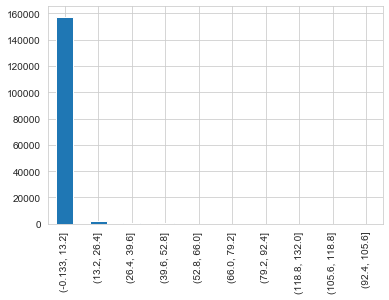

In [115]:
AllData06.AccCount.value_counts(bins = 10).plot(kind='bar')

In [118]:
AllData06.AccCount.value_counts().index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21,  23,  22,  24,  25,
             27,  28,  26,  29,  30,  35,  36,  33,  32,  31,  34,  37,  40,
             38,  39,  45,  43,  41,  48,  42,  46,  44,  52,  50,  49,  51,
             47,  56,  60,  57,  53,  54,  58,  59,  61,  63,  55,  67,  74,
             76,  65,  77,  70,  71,  62,  66,  64,  69,  68,  75,  91,  83,
             84,  89,  85,  95, 132,  80,  79,  78, 111],
           dtype='int64')

In [119]:
AllData06.columns

Index(['medwid', 'no_lanes', 'lanewid', 'aadt', 'trf_cntl', 'curv_rad',
       'begmp', 'seg_lng', 'endmp', 'access', 'oneway', 'spd_limt', 'med_type',
       'surf_typ', 'cnty_rte', 'rururb', 'rodwycls', 'AccCount'],
      dtype='object')

In [120]:
AllData06.trf_cntl.value_counts()

1    25575
A    10775
0     8007
N     6609
9     6341
8     6078
5      475
6      386
2      369
4      272
7      240
3      172
B       21
Name: trf_cntl, dtype: int64

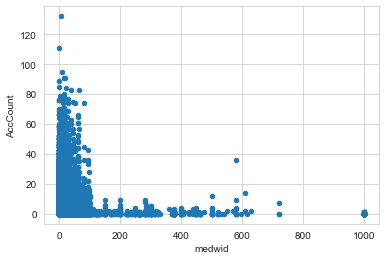

In [121]:
AllData06.plot.scatter(x = 'medwid', y ='AccCount')

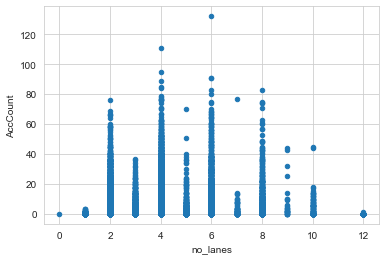

In [122]:
AllData06.plot.scatter(x = 'no_lanes', y ='AccCount')

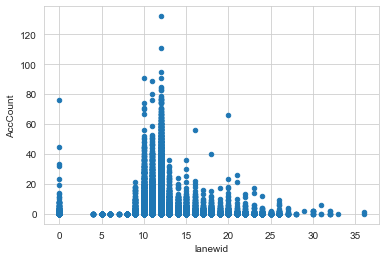

In [123]:
AllData06.plot.scatter(x = 'lanewid', y ='AccCount')

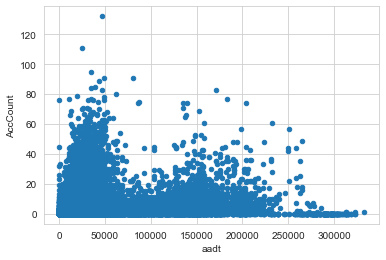

In [124]:
AllData06.plot.scatter(x = 'aadt', y ='AccCount')

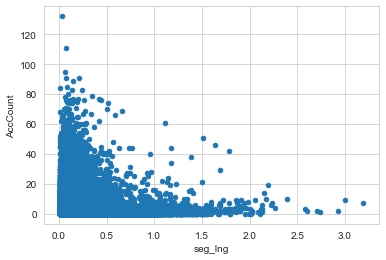

In [126]:
AllData06.plot.scatter(x = 'seg_lng', y ='AccCount')

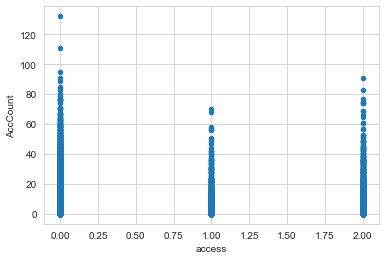

In [127]:
AllData06.plot.scatter(x = 'access', y ='AccCount')

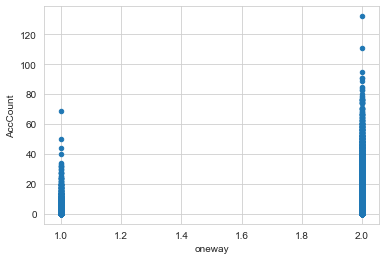

In [128]:
AllData06.plot.scatter(x = 'oneway', y ='AccCount')

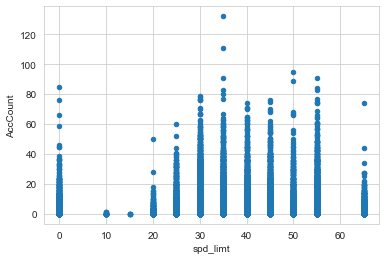

In [129]:
AllData06.plot.scatter(x = 'spd_limt', y ='AccCount')

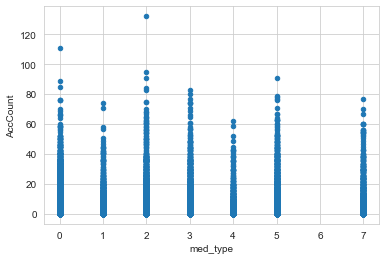

In [130]:
AllData06.plot.scatter(x = 'med_type', y ='AccCount')

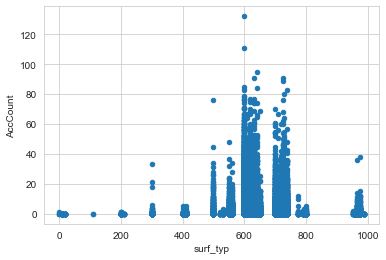

In [131]:
AllData06.plot.scatter(x = 'surf_typ', y ='AccCount')

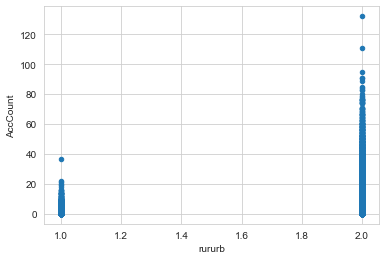

In [132]:
AllData06.plot.scatter(x = 'rururb', y ='AccCount')

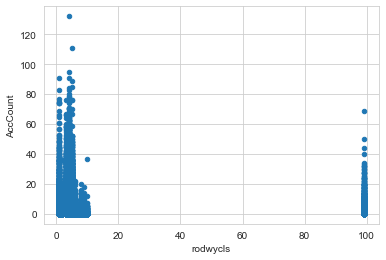

In [133]:
AllData06.plot.scatter(x = 'rodwycls', y ='AccCount')

In [134]:
corr = AllData06[['medwid', 'no_lanes', 'lanewid', 'aadt', 'trf_cntl','seg_lng','access', 'oneway', 'spd_limt', 'med_type',
       'surf_typ','rururb', 'rodwycls', 'AccCount']].corr()
corr.style.background_gradient(cmap='coolwarm')

,medwid,no_lanes,lanewid,aadt,seg_lng,access,oneway,spd_limt,med_type,surf_typ,rururb,rodwycls,AccCount
medwid,1.000000,0.398464,0.046062,0.262245,0.047566,0.572429,0.039220,0.240614,0.197209,0.193567,0.053265,-0.079005,0.021565
no_lanes,0.398464,1.000000,-0.002944,0.717556,-0.050692,0.526949,0.027514,0.179516,0.459690,0.271548,0.464824,-0.120371,0.254341
lanewid,0.046062,-0.002944,1.000000,0.028974,-0.063829,0.052131,-0.076690,0.064741,0.082173,0.223808,0.020736,-0.003233,-0.005461
aadt,0.262245,0.717556,0.028974,1.000000,-0.041127,0.461992,0.022502,0.153242,0.347739,0.167397,0.387634,-0.116560,0.260675
seg_lng,0.047566,-0.050692,-0.063829,-0.041127,1.000000,0.071411,0.037045,0.056700,-0.088049,-0.018455,-0.172120,-0.008839,0.082408
access,0.572429,0.526949,0.052131,0.461992,0.071411,1.000000,0.040453,0.319063,0.192666,0.250999,0.071178,-0.102206,0.016242
oneway,0.039220,0.027514,-0.076690,0.022502,0.037045,0.040453,1.000000,0.096256,0.056401,-0.028685,-0.146550,-0.932565,-0.029854
spd_limt,0.240614,0.179516,0.064741,0.153242,0.056700,0.319063,0.096256,1.000000,0.059355,0.137375,-0.062895,-0.120806,-0.014470
med_type,0.197209,0.459690,0.082173,0.347739,-0.088049,0.192666,0.056401,0.059355,1.000000,0.161516,0.332938,-0.121286,0.184602
surf_typ,0.193567,0.271548,0.223808,0.167397,-0.018455,0.250999,-0.028685,0.137375,0.161516,1.000000,0.109726,-0.098428,0.016738


In [137]:
AllData06[(AllData06.medwid == 0) & (AllData06.med_type != 0)].shape[0]
# All locations with median has median width

0

In [140]:
AllData06[(AllData06.no_lanes == 0)].shape[0]

1

In [141]:
AllData06[(AllData06.lanewid == 0)].shape[0]

1628

In [142]:
AllData06[(AllData06.aadt == 0)].shape[0]

1576

In [161]:
sum(AllData06[(AllData06.aadt < 10)].AccCount)

668

In [143]:
AllData06[(AllData06.seg_lng == 0)].shape[0]

0

In [163]:
print(AllData06[(AllData06.spd_limt == 0)].shape[0])
print(sum(AllData06[(AllData06.spd_limt == 0)].AccCount))
#Unknown speed limits

25987
11379


In [162]:
sum(AllData06[AllData06.rodwycls == 99].AccCount)

6380

In [186]:
max(AllData06.medwid)
#999 corresponds to > 100

999

In [188]:
max(AllData06.lanewid)
#999 corresponds to > 100

36

In [169]:
AllData06_filtered = AllData06[(AllData06.no_lanes != 0)&(AllData06.lanewid != 0)&(AllData06.aadt > 10)&(AllData06.spd_limt != 0)]
#&(AllData06.rodwycls != 99)

In [170]:
#print(AllData06_filtered.shape[0])
#print(AllData06.shape[0])
print(AllData06_filtered.shape[0], "(", round(AllData06_filtered.shape[0]*100/AllData06.shape[0],2),"%) records remain after filter with ",sum(AllData06_filtered.AccCount)," accidents")

134287 ( 83.57 %) records remain after filter with  190306  accidents


In [171]:
corr_filter = AllData06_filtered[['medwid', 'no_lanes', 'lanewid', 'aadt', 'trf_cntl','seg_lng','access', 'oneway', 'spd_limt', 'med_type',
       'surf_typ','rururb', 'rodwycls', 'AccCount']].corr()
corr_filter.style.background_gradient(cmap='coolwarm')

,medwid,no_lanes,lanewid,aadt,seg_lng,access,oneway,spd_limt,med_type,surf_typ,rururb,rodwycls,AccCount
medwid,1.000000,0.393760,0.038738,0.255388,0.065664,0.587748,0.041016,0.325002,0.185975,0.208432,0.033809,-0.081294,0.012729
no_lanes,0.393760,1.000000,-0.058159,0.716913,-0.036015,0.533388,0.026207,0.022765,0.457747,0.290493,0.457586,-0.118806,0.244643
lanewid,0.038738,-0.058159,1.000000,-0.009978,-0.054370,0.048060,-0.106392,-0.051965,0.064207,0.069701,0.025485,0.096196,-0.028954
aadt,0.255388,0.716913,-0.009978,1.000000,-0.031991,0.463958,0.026008,0.029877,0.344977,0.172166,0.380764,-0.121896,0.250683
seg_lng,0.065664,-0.036015,-0.054370,-0.031991,1.000000,0.093309,0.037016,0.226413,-0.078335,-0.000177,-0.173069,-0.014407,0.094785
access,0.587748,0.533388,0.048060,0.463958,0.093309,1.000000,0.048553,0.459058,0.184546,0.281147,0.048339,-0.112315,0.005395
oneway,0.041016,0.026207,-0.106392,0.026008,0.037016,0.048553,1.000000,0.188205,0.057790,-0.016284,-0.135010,-0.979984,-0.027440
spd_limt,0.325002,0.022765,-0.051965,0.029877,0.226413,0.459058,0.188205,1.000000,-0.069448,0.101869,-0.456535,-0.139839,-0.186735
med_type,0.185975,0.457747,0.064207,0.344977,-0.078335,0.184546,0.057790,-0.069448,1.000000,0.160789,0.333894,-0.123955,0.185838
surf_typ,0.208432,0.290493,0.069701,0.172166,-0.000177,0.281147,-0.016284,0.101869,0.160789,1.000000,0.098607,-0.010785,0.004260


In [172]:
print(AllData06_filtered[AllData06_filtered['AccCount']==0].shape[0], "records had no accidents and ",AllData06_filtered[AllData06_filtered['AccCount']>0].shape[0], "records had accidents")

89073 records had no accidents and  45214 records had accidents


In [187]:
#AllData06_filtered['AccCount_Factor'] = 0
#AllData06_filtered.loc[(AllData06_filtered['AccCount']>0),'AccCount_Factor']

In [178]:
AllData06_filtered.columns

Index(['medwid', 'no_lanes', 'lanewid', 'aadt', 'trf_cntl', 'curv_rad',
       'begmp', 'seg_lng', 'endmp', 'access', 'oneway', 'spd_limt', 'med_type',
       'surf_typ', 'cnty_rte', 'rururb', 'rodwycls', 'AccCount',
       'AccCount_Factor'],
      dtype='object')

In [185]:
AllData06_filtered.AccCount_Factor.value_counts()

0    89073
1    45214
Name: AccCount_Factor, dtype: int64

In [202]:
categories_medwid = pd.cut(AllData06_filtered.medwid,bins=[-5,0,5,10,30,50,100,1000],labels=['No Median','<5','6-10','11-30','31-50','51-100','>100'])
categories_lanewid = pd.cut(AllData06_filtered.lanewid,bins=[0,8,10,15,20,100],labels=['<8','9-10','11-15','16-20','>20'])

In [204]:
categories_lanewid.value_counts()

11-15    123766
9-10       7854
16-20      2173
>20         484
<8           10
Name: lanewid, dtype: int64

In [205]:
AllData06_filtered['medwid_cat'] = categories_medwid
AllData06_filtered['lanewid_cat'] = categories_lanewid

/Users/jacob/anaconda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jacob/anaconda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [206]:
AllData06_filtered.lanewid_cat.value_counts()

11-15    123766
9-10       7854
16-20      2173
>20         484
<8           10
Name: lanewid_cat, dtype: int64

Text(0, 0.5, 'Frequency')

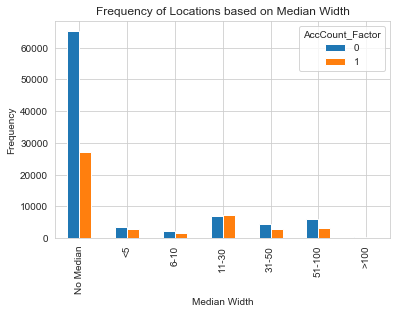

In [208]:
pd.crosstab(AllData06_filtered.medwid_cat,AllData06_filtered.AccCount_Factor).plot(kind='bar')
plt.title('Frequency of Locations based on Median Width')
plt.xlabel('Median Width')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

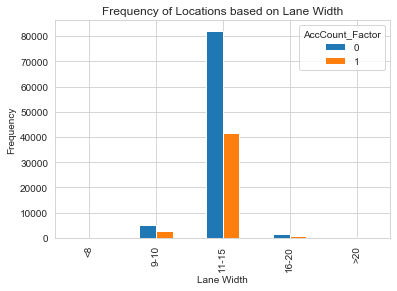

In [210]:
pd.crosstab(AllData06_filtered.lanewid_cat,AllData06_filtered.AccCount_Factor).plot(kind='bar')
plt.title('Frequency of Locations based on Lane Width')
plt.xlabel('Lane Width')
plt.ylabel('Frequency')

In [223]:
AllData06_filtered.groupby(['AccCount_Factor','aadt']).agg('count')['medwid']

AccCount_Factor  aadt  
0                25        37
                 29         7
                 50        11
                 75         6
                 100       22
                           ..
1                281100     1
                 285800     1
                 312800     2
                 322500     1
                 332400     1
Name: medwid, Length: 2221, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x14173fe90>,
      dtype=object)

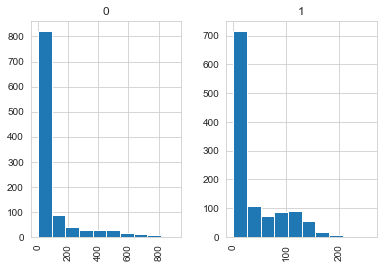

In [226]:
AllData06_filtered.groupby(['AccCount_Factor','aadt']).agg('count')['medwid'].hist(by = 'AccCount_Factor')
#sns.scatterplot(x="aadt", y="AccCount", data=AllData06_filtered, hue="AccCount_Factor")

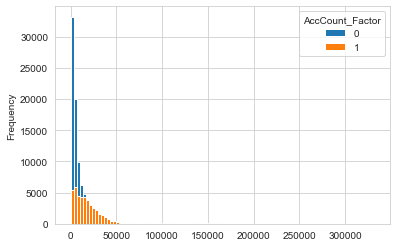

In [227]:
AllData06_filtered.pivot(columns="AccCount_Factor", values="aadt").plot.hist(bins=100)

In [228]:
cat_vars=['medwid_cat','lanewid_cat','access','oneway','med_type','surf_typ','rururb','rodwycls']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(AllData06_filtered[var], prefix=var)
    data1=AllData06_filtered.join(cat_list)
    AllData06_filtered=data1
cat_vars=['medwid_cat','lanewid_cat','access','oneway','med_type','surf_typ','rururb','rodwycls']
data_vars=AllData06_filtered.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [235]:
#AllData06_filtered.columns
logistic_vars = ['no_lanes','aadt','spd_limt','medwid_cat_No Median',
       'medwid_cat_<5', 'medwid_cat_6-10', 'medwid_cat_11-30',
       'medwid_cat_31-50', 'medwid_cat_51-100','lanewid_cat_<8', 'lanewid_cat_9-10', 'lanewid_cat_11-15',
       'lanewid_cat_16-20','access_0', 'access_1','oneway_1','med_type_0', 'med_type_1',
       'med_type_2', 'med_type_3', 'med_type_4', 'med_type_5','surf_typ_300', 'surf_typ_400', 'surf_typ_410', 'surf_typ_500',
       'surf_typ_520', 'surf_typ_530', 'surf_typ_550', 'surf_typ_560',
       'surf_typ_600', 'surf_typ_610', 'surf_typ_620', 'surf_typ_625',
       'surf_typ_630', 'surf_typ_640', 'surf_typ_650', 'surf_typ_700',
       'surf_typ_710', 'surf_typ_720', 'surf_typ_725', 'surf_typ_730',
       'surf_typ_740', 'surf_typ_775', 'surf_typ_790', 'surf_typ_792',
       'surf_typ_800', 'surf_typ_954', 'surf_typ_956', 'surf_typ_957',
       'surf_typ_963', 'surf_typ_964', 'surf_typ_965', 'surf_typ_967',
       'surf_typ_972', 'surf_typ_973', 'surf_typ_975',
       'rururb_1', 'rururb_2', 'rodwycls_1', 'rodwycls_2', 'rodwycls_3',
       'rodwycls_4', 'rodwycls_5', 'rodwycls_6', 'rodwycls_7', 'rodwycls_8',
       'rodwycls_9', 'rodwycls_10','AccCount_Factor']

In [236]:
logisticData_final=AllData06_filtered[logistic_vars]

In [237]:
logisticData_final.shape

(134287, 70)

In [238]:
X = logisticData_final.loc[:, logisticData_final.columns != 'AccCount_Factor']
y = logisticData_final.loc[:, logisticData_final.columns == 'AccCount_Factor']

In [240]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
#from imblearn.over_sampling import SMOTE
#os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
#os_data_X,os_data_y=os.fit_sample(X_train, y_train)
#os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
#os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
#print("length of oversampled data is ",len(os_data_X))
#print("Number of no accident location in oversampled data",len(os_data_y[os_data_y['y']==0]))
#print("Number of accident location",len(os_data_y[os_data_y['y']==1]))
#print("Proportion of no accident location data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
#print("Proportion of accident location data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

In [249]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [250]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [251]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[23488  3229]
 [ 7852  5718]]


In [139]:
sum(TrainingData06.trf_cntl.isna())

95373

In [140]:
len(TrainingData06)

160693

In [141]:
TrainingData06.trf_cntl.value_counts()

1    25575
A    10775
0     8007
N     6609
9     6341
8     6078
5      475
6      386
2      369
4      272
7      240
3      172
B       21
Name: trf_cntl, dtype: int64